In [1]:
import numpy as np  
from netCDF4 import Dataset
import pandas as pd
import xarray as xr
import geopandas as gpd
import numpy.ma as ma

In [2]:
daymet_ds = Dataset("daymet_v4_tmin_annavg_na_2008.nc", 'r') # read the netCDF file

In [3]:
print( daymet_ds.variables['tmin'])

<class 'netCDF4._netCDF4.Variable'>
float32 tmin(time, y, x)
    _FillValue: -9999.0
    units: degrees C
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: minimum within days time: mean over days
    long_name: annual average of daily minimum temperature
unlimited dimensions: time
current shape = (1, 8075, 7814)
filling on


In [4]:
print( daymet_ds.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(y, x)
    units: degrees_east
    long_name: longitude coordinate
    standard_name: longitude
unlimited dimensions: 
current shape = (8075, 7814)
filling on, default _FillValue of 9.969209968386869e+36 used



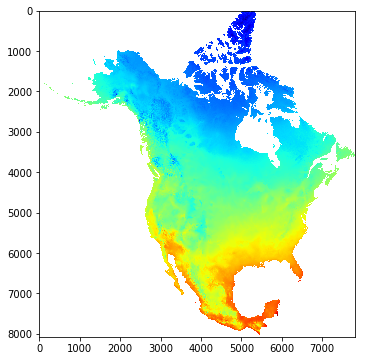

In [6]:
import matplotlib.pyplot as plt
#daymet_ds = nc.Dataset("prcp_daily_na_1980.nc", 'r+')
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(daymet_ds.variables['tmin'][0], cmap='jet')

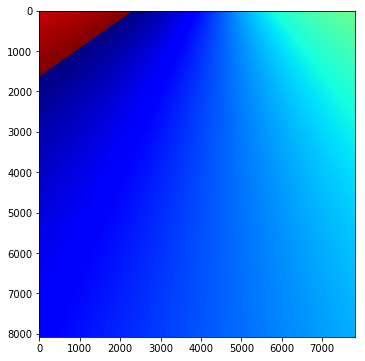

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(daymet_ds.variables['lon'], cmap='jet')

In [28]:
print( daymet_ds.variables['x'])

<class 'netCDF4._netCDF4.Variable'>
float32 x(x)
    units: m
    long_name: x coordinate of projection
    standard_name: projection_x_coordinate
unlimited dimensions: 
current shape = (7814,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [9]:
lat = daymet_ds.variables['lat'][:]  # Reads the whole array
lon = daymet_ds.variables['lon'][:]
tmin = daymet_ds.variables['tmin'][:]
x = daymet_ds.variables['x'][:]
y = daymet_ds.variables['y'][:]

In [32]:
print(lon.shape)
print(lat.shape)
print(tmin.shape)
print(y.shape)
print(x.shape)
print(lon)
print(x)

(8075, 7814)
(8075, 7814)
(8075, 7814)
(8075,)
(7814,)
[[ 156.37123    156.37682    156.38242   ...   -6.172987    -6.1630044
    -6.1530266]
 [ 156.38762    156.39322    156.3988    ...   -6.193871    -6.183884
    -6.173902 ]
 [ 156.404      156.4096     156.41519   ...   -6.2147493   -6.2047586
    -6.1947727]
 ...
 [-136.90382   -136.89676   -136.88968   ...  -72.83402    -72.82625
   -72.818474 ]
 [-136.90048   -136.8934    -136.88632   ...  -72.836655   -72.82887
   -72.8211   ]
 [-136.89713   -136.89005   -136.88297   ...  -72.83928    -72.831505
   -72.82372  ]]
[-4560250. -4559250. -4558250. ...  3250750.  3251750.  3252750.]


In [11]:
####tmin_flat = tmin.shape=(8075,7814)
tmin.shape=(8075,7814) # need to get this to a 2-d array for masking to work.  might read it in as such earlier...
print(tmin.shape)
####tmin_flat

(8075, 7814)


In [12]:
print(np.max(tmin))
print(np.min(tmin))
####print(np.max(tmin_flat))
####print(np.min(tmin_flat))

31.323315
-30.399479


In [13]:
#np.max(lon, axis=0, keepdims=True)
print(np.max(lon))
print(np.min(lon))
print(np.max(lat))
print(np.min(lat))

179.99992
-179.9999
83.793304
6.0813837


In [ ]:
lat

In [14]:
# z = ma.masked_values([1.0, 1.e20, 3.0, 4.0], 1.e20)
# a = ma.masked_where(a < 3, a)
tminmask = ma.masked_where(tmin == -9999.0, tmin)
####tmin_flatmask = ma.masked_where(tmin_flat == -9999.0, tmin_flat)
#tminmask = ma.masked_where(tmin < 0, tmin)
#tminmask = ma.masked_invalid(tmin)
#tminmask = ma.masked_equal(tmin, -9999.0)
#tminmask = ma.masked_where(tmin > 0, tmin)

In [15]:
tminmask
####tmin_flatmask

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

In [16]:
print(np.min(tminmask))
print(np.max(tminmask))
####print(np.min(tmin_flatmask))
####print(np.max(tmin_flatmask))

-30.399479
31.323315


In [17]:
#https://currents.soest.hawaii.edu/ocn_data_analysis/_static/masked_arrays.html
print("unmasked values are", tminmask.compressed())
####print("unmasked values are", tmin_flatmask.compressed())

unmasked values are [-20.082932 -20.115946 -20.116192 ...  22.360384  22.277725  22.192163]


In [18]:
print("tminmask has", tminmask.count(), "unmasked values")
####print("tminmask has", tmin_flatmask.count(), "unmasked values")

tminmask has 21432539 unmasked values


In [19]:
#https://stackoverflow.com/questions/16495298/how-to-apply-a-mask-from-one-array-to-another-array
#new_x = np.ma.masked_where(np.ma.getmask(m), x)
#mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mlat = ma.masked_array(lat, mask=tminmask)
mlon = ma.masked_array(lon, mask=tminmask)
mlat_again = np.ma.masked_where(np.ma.getmask(tminmask), lat)  # this one works
mlon_again = np.ma.masked_where(np.ma.getmask(tminmask), lon)  # this one works
#prcp_1980_ds['prcp'][x,:,:] = np.ma.array(prcp_1980_ds['prcp'][x,:,:], mask=total_mask)

In [20]:
print(np.max(lon))
print(np.min(lon))
print(np.max(lat))
print(np.min(lat))

179.99992
-179.9999
83.793304
6.0813837


In [23]:
#print(np.max(mlat_np))
#print(np.min(mlat_np))
print(np.max(mlat))
print(np.min(mlat))
print(np.max(mlon))
print(np.min(mlon))
print(np.max(mlon_again))
print(np.min(mlon_again))
print(np.max(mlat_again))
print(np.min(mlat_again))

--
--
--
--
-52.61672
-179.15984
83.2167
14.536974


****